In [17]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Import dataset
data = pd.read_csv("Walmart.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [19]:
print("\n2. Type de données et valeurs Manquantes:")
print(data.info())


2. Type de données et valeurs Manquantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [20]:
data.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [21]:
data.duplicated().value_counts()

False    6435
Name: count, dtype: int64

In [22]:
print("\n Nombre de valeurs Manquantes:")
print(data.isnull().sum())
print(f"\nPourcentage de valeurs manquante:\n{(data.isnull().sum() / len(data) * 100).round(2)}%")


 Nombre de valeurs Manquantes:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Pourcentage de valeurs manquante:
Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64%


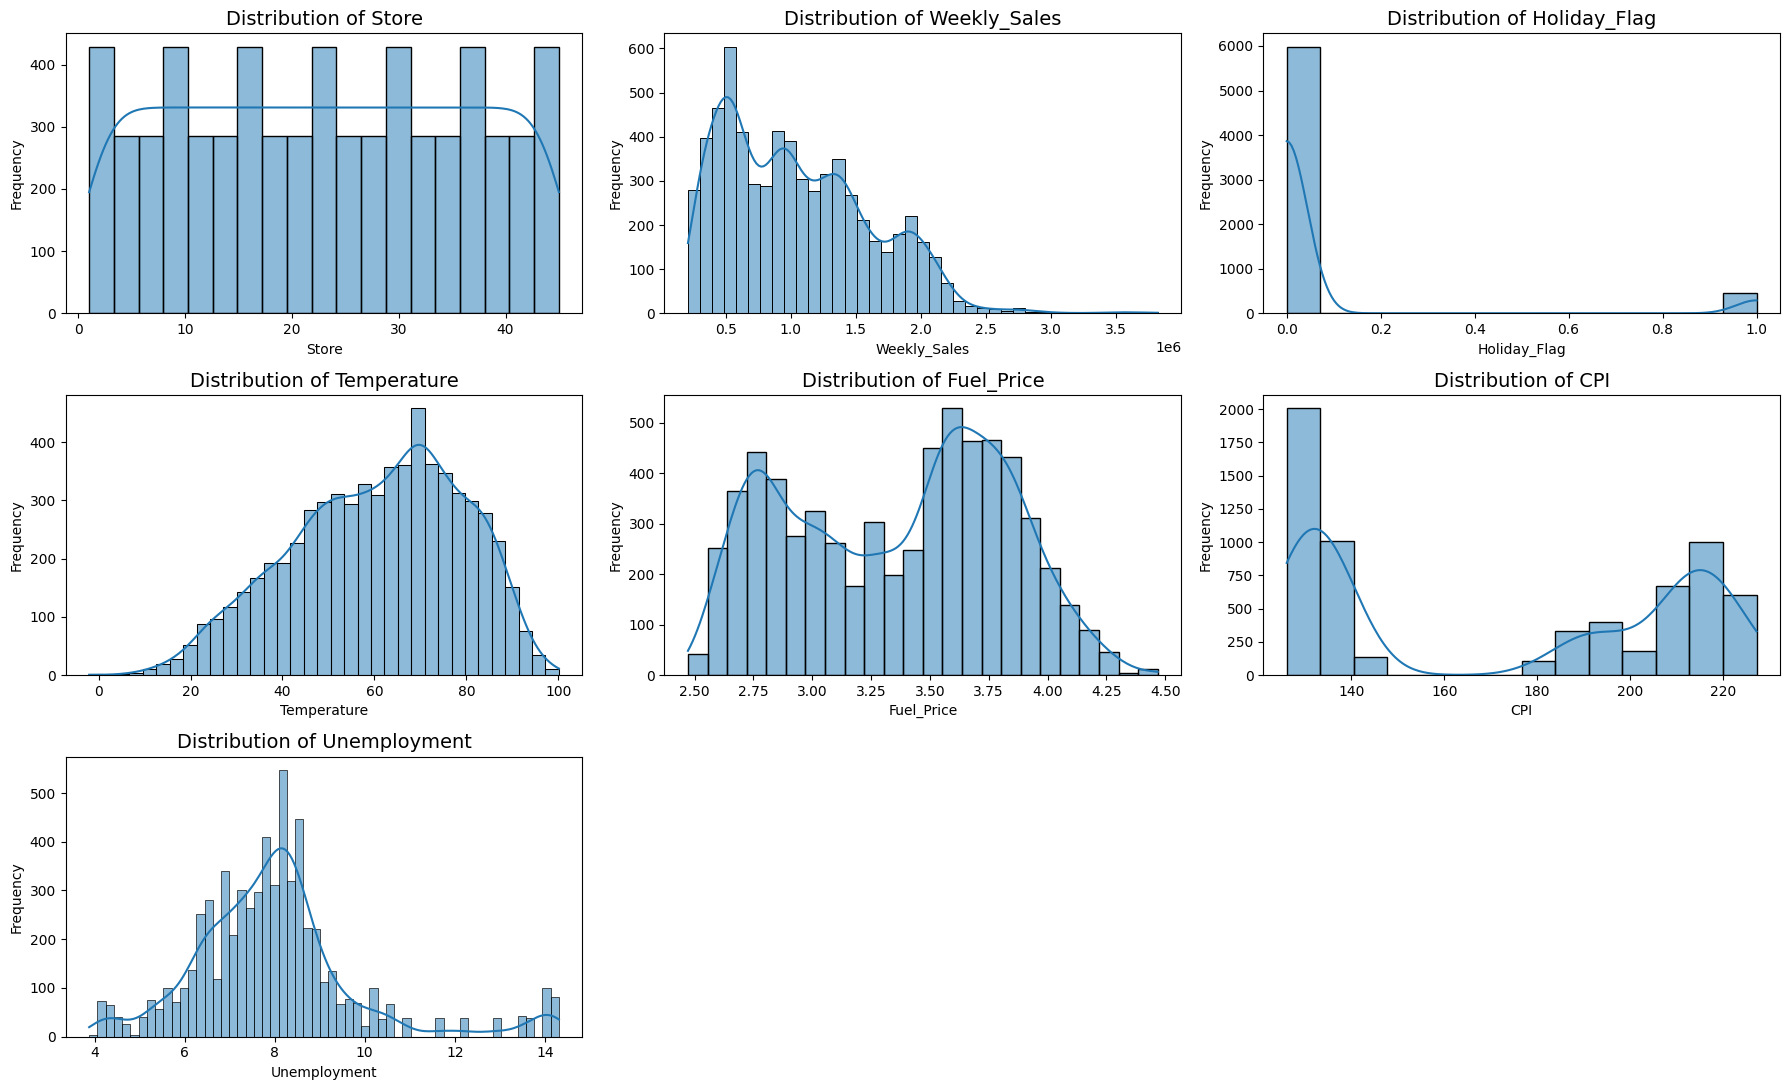

In [23]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
fig, axes = plt.subplots(nrows=len(numerical_cols) // 3 + 1, ncols=3, figsize=(18, 5*len(numerical_cols)//3))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    if i < len(axes):
        sns.histplot(data[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

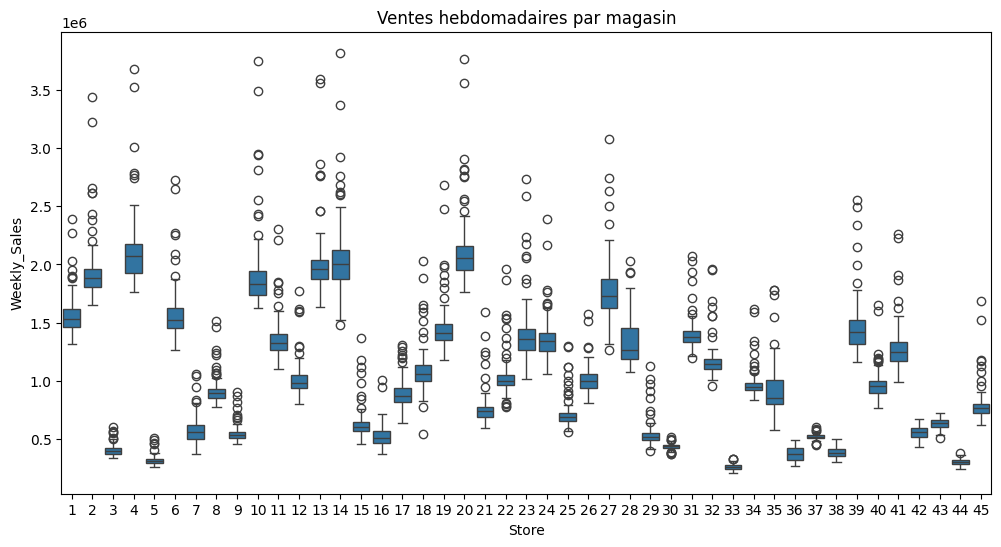

In [24]:
#  Visualiser les ventes par magasin
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title("Ventes hebdomadaires par magasin")
plt.show()

In [25]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


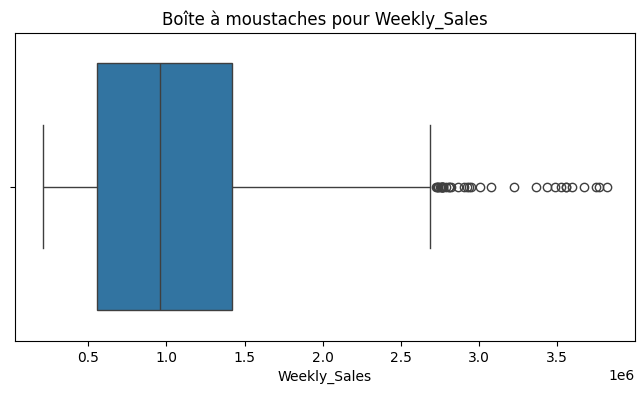

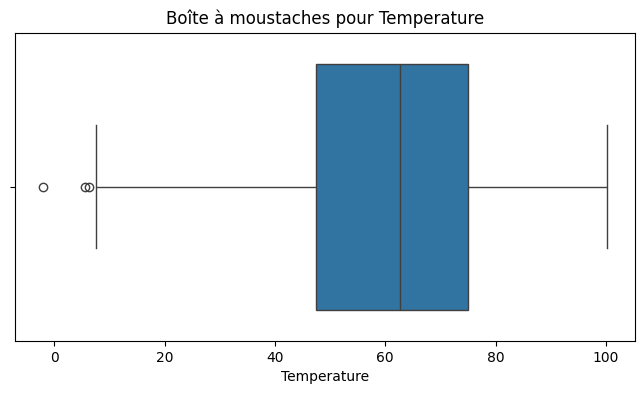

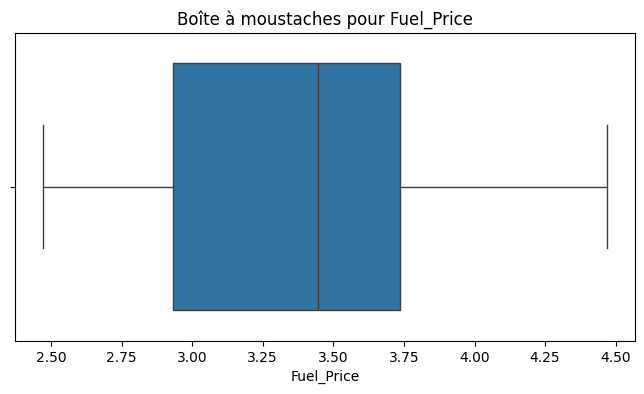

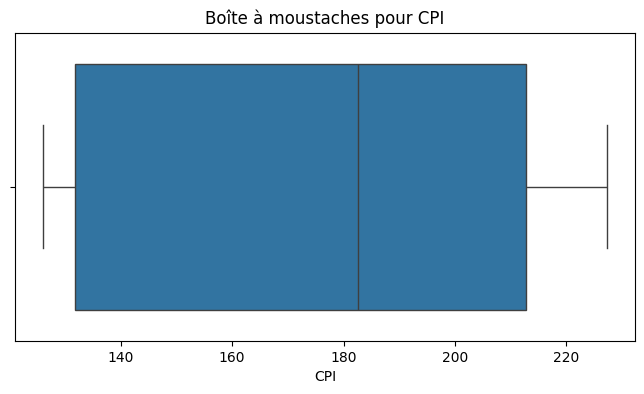

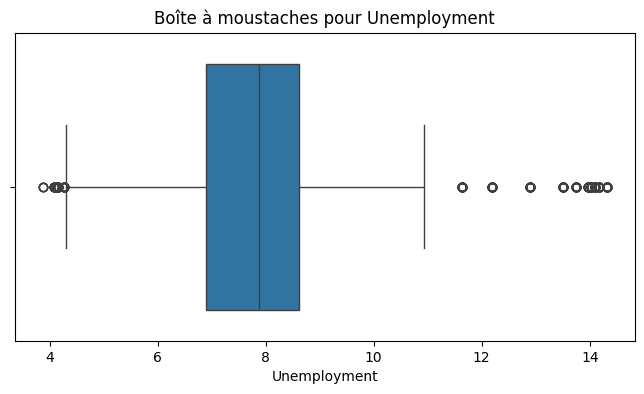

In [26]:
# Vérification des valeurs aberrantes
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boîte à moustaches pour {col}')
    plt.show()

In [27]:
# Fonction pour traiter les valeurs aberrantes avec les IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Application à Weekly_Sales (notre variable cible)
data_clean = remove_outliers(data, 'Weekly_Sales')

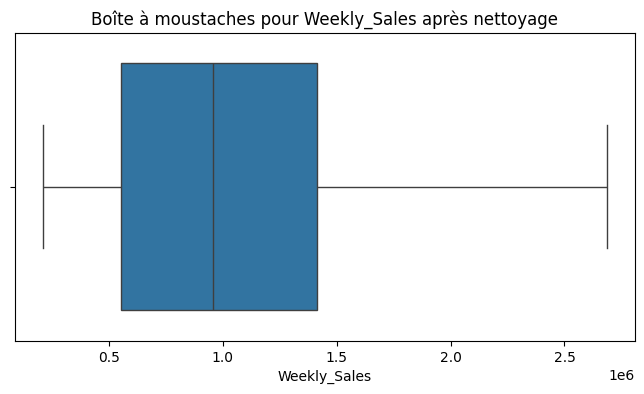

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data_clean['Weekly_Sales'])
plt.title('Boîte à moustaches pour Weekly_Sales après nettoyage')
plt.show()

<Axes: >

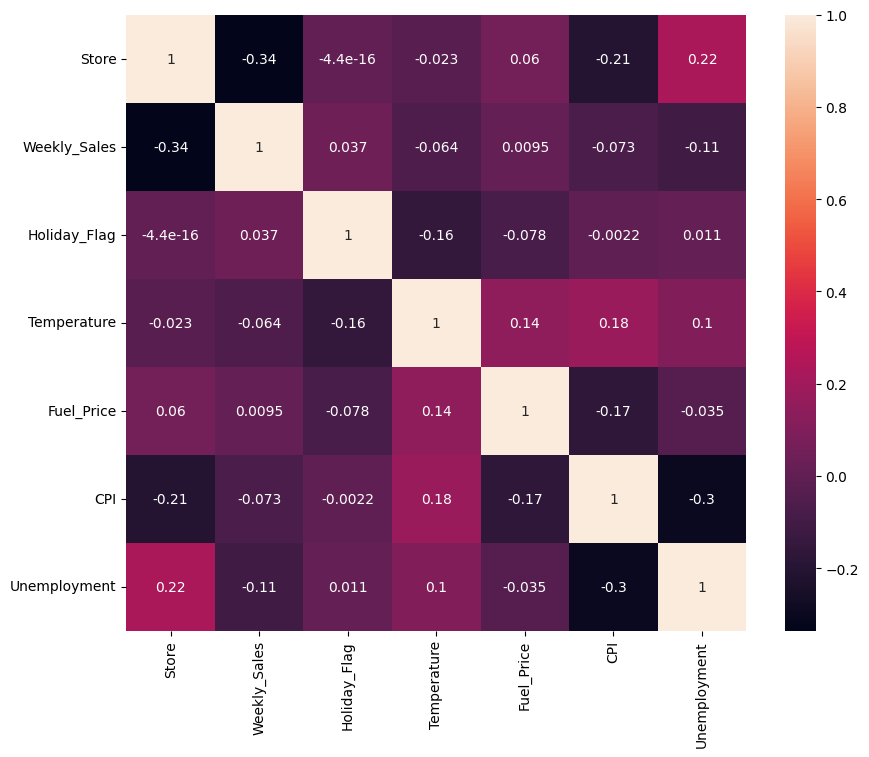

In [29]:
# Matrice de corrélation
new=data.drop("Date", axis = 1)
plt.figure(figsize = (10,8))
sns.heatmap(new.corr(), annot = True)

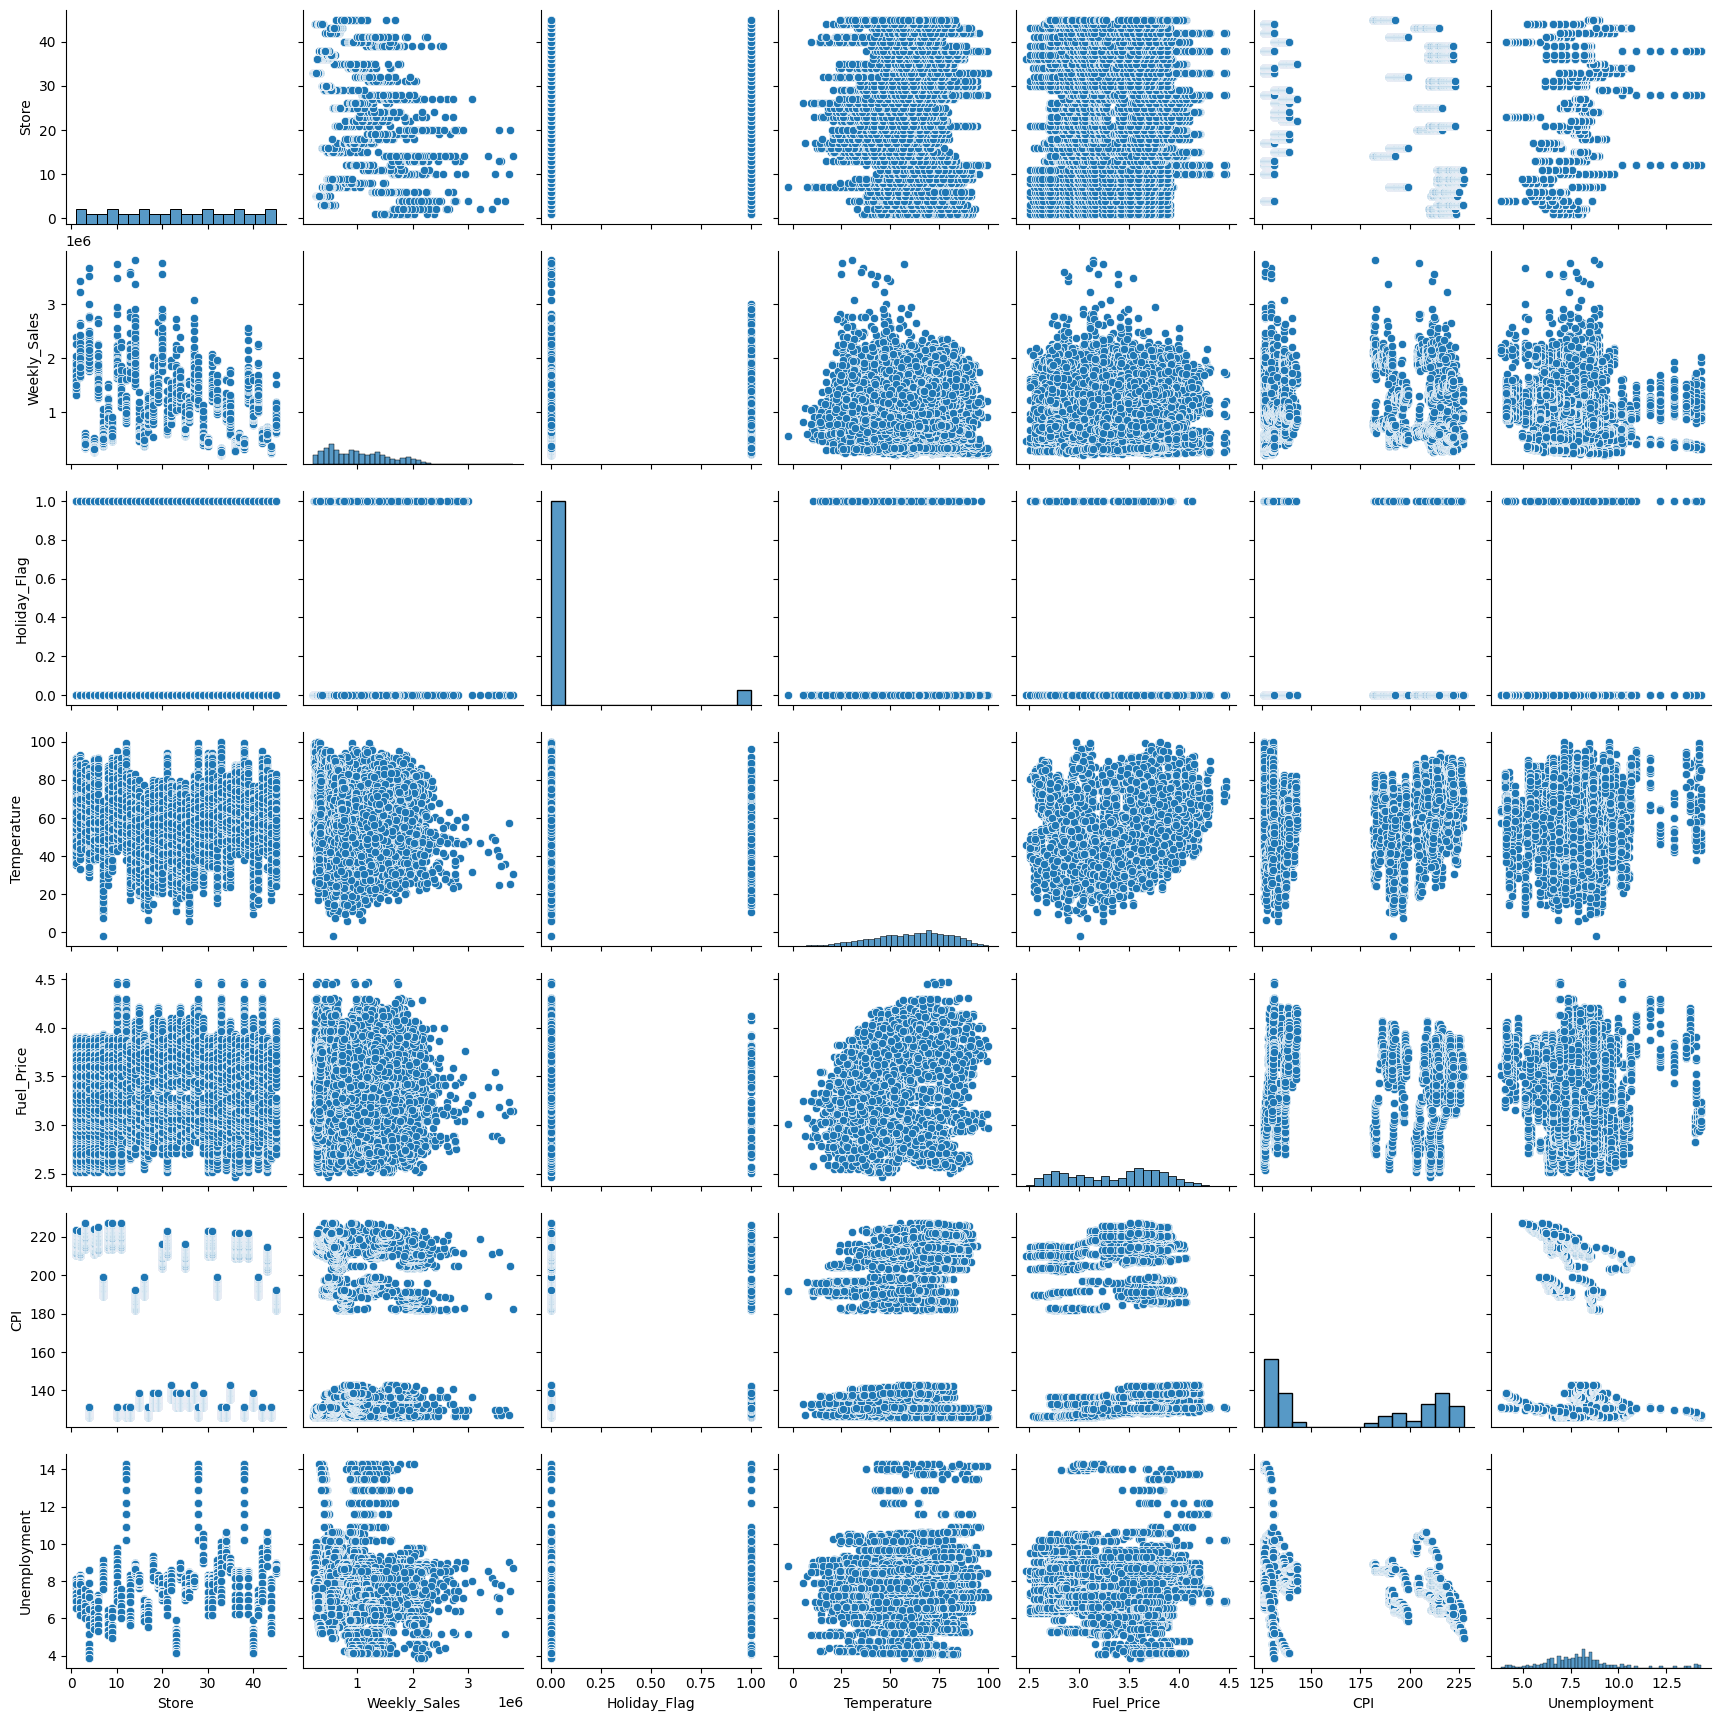

In [30]:
sns.pairplot(data = data)

In [31]:
data = data.drop('Date', axis=1) 

In [32]:
from sklearn.model_selection import train_test_split
X = data.drop("Weekly_Sales", axis=1)  # Features
y = data["Weekly_Sales"]  # Target continue

# 2. Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR  # Notez "SVR" (R pour Regression) et non "SVC"
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Standardisation (crucial pour SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation du modèle SVM-Régression
svm_regressor = SVR(
    kernel='rbf',  # Kernel radial (par défaut). Essayez aussi 'linear' ou 'poly'
    C=1.0,         # Paramètre de régularisation
    epsilon=0.1    # Marge d'erreur tolérée
)

# Entraînement
svm_regressor.fit(X_train_scaled, y_train)

# Prédiction et évaluation
y_pred = svm_regressor.predict(X_test_scaled)

# Métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 471102.10
MSE: 331296854057.87
RMSE: 575583.92
R²: -0.03


KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor  # <-- Modèle de régression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation du modèle
knn_regressor = KNeighborsRegressor(
    n_neighbors=5,  # Nombre de voisins
    metric="minkowski",  # Distance utilisée
    p=2  # p=2 pour distance euclidienne
)

# Entraînement
knn_regressor.fit(X_train_scaled, y_train)

# Prédiction sur le test set
y_pred = knn_regressor.predict(X_test_scaled)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 198227.93
MSE: 99650053750.31
RMSE: 315673.97
R²: 0.69


In [35]:
# Résultats des modèles
knn_mae = 198227.93
knn_mse = 99650053750.31
knn_rmse = 315673.97
knn_r2 = 0.69

svm_mae = 471102.10
svm_mse = 331296854057.87
svm_rmse = 575583.92
svm_r2 = -0.03

# Comparaison et explication
print("Comparaison des modèles :")
print(f"  KNN: MAE={knn_mae:.2f}, MSE={knn_mse:.2f}, RMSE={knn_rmse:.2f}, R²={knn_r2:.2f}")
print(f"  SVM: MAE={svm_mae:.2f}, MSE={svm_mse:.2f}, RMSE={svm_rmse:.2f}, R²={svm_r2:.2f}")
print("\n")

print("Explication brève :")
if knn_mae < svm_mae and knn_mse < svm_mse and knn_rmse < svm_rmse and knn_r2 > svm_r2:
    print("Le modèle KNN est bien meilleur que le modèle SVM.")
    print("Ses erreurs (MAE, MSE, RMSE) sont significativement plus faibles, indiquant des prédictions plus précises.")
    print(f"Son R² de {knn_r2:.2f} montre qu'il explique une bonne partie de la variance des données.")
    print(f"Le R² négatif du SVM ({svm_r2:.2f}) suggère qu'il fonctionne moins bien qu'un modèle simple utilisant la moyenne.")
else:
    print("Les résultats ne montrent pas clairement la supériorité du KNN selon tous les critères (vérifiez les valeurs).")
    print("Cependant, en général, des erreurs plus faibles et un R² plus élevé indiquent un meilleur modèle.")
    if knn_mae < svm_mae:
        print("Le KNN a une erreur absolue moyenne (MAE) plus faible.")
    if knn_mse < svm_mse:
        print("Le KNN a une erreur quadratique moyenne (MSE) plus faible.")
    if knn_rmse < svm_rmse:
        print("Le KNN a une racine de l'erreur quadratique moyenne (RMSE) plus faible.")
    if knn_r2 > svm_r2:
        print("Le KNN a un R² plus élevé, expliquant mieux la variance.")
    if svm_r2 < 0:
        print("Le R² négatif du SVM indique une très mauvaise performance.")

Comparaison des modèles :
  KNN: MAE=198227.93, MSE=99650053750.31, RMSE=315673.97, R²=0.69
  SVM: MAE=471102.10, MSE=331296854057.87, RMSE=575583.92, R²=-0.03


Explication brève :
Le modèle KNN est bien meilleur que le modèle SVM.
Ses erreurs (MAE, MSE, RMSE) sont significativement plus faibles, indiquant des prédictions plus précises.
Son R² de 0.69 montre qu'il explique une bonne partie de la variance des données.
Le R² négatif du SVM (-0.03) suggère qu'il fonctionne moins bien qu'un modèle simple utilisant la moyenne.


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Supposons que vous ayez déjà X et y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]
}

# Initialiser le modèle KNeighborsRegressor
knn = KNeighborsRegressor()

# Initialiser GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Lancer la recherche
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score
print("Meilleurs hyperparamètres:", grid_search.best_params_)
print("Meilleur score (MSE négatif):", grid_search.best_score_)

# Utiliser le meilleur modèle pour les prédictions
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Optimisé): {mae:.2f}")
print(f"MSE (Optimisé): {mse:.2f}")
print(f"RMSE (Optimisé): {rmse:.2f}")
print(f"R² (Optimisé): {r2:.2f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Meilleurs hyperparamètres: {'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Meilleur score (MSE négatif): -78257210975.38339
MAE (Optimisé): 158361.11
MSE (Optimisé): 74206694043.30
RMSE (Optimisé): 272409.06
R² (Optimisé): 0.77


In [38]:
from joblib import dump, load

# Sauvegarde du modèle et du scaler
dump(knn_regressor, 'knn_regressor.joblib') 
dump(scaler, 'scaler.joblib') 

['scaler.joblib']